In [1]:
from train import train
train_loss, losses, model = train()

Using device cuda


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


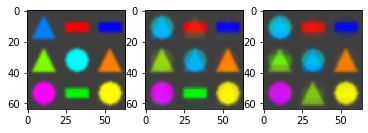

<Figure size 432x288 with 0 Axes>

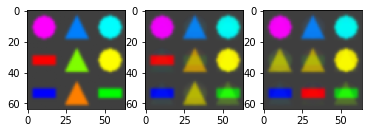

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
from data import get_loader
import torch
import numpy as np
import matplotlib.pyplot as plt
loader = get_loader(total_samples=2, dataset="color_shapes", deletions=0, batch_size=1)
from parameters import parameters
parameters.gaussian_noise = .4 / 256

def plot_hist(x):
    plt.plot(np.linspace(x.min().cpu().detach().numpy(), x.max().cpu().detach().numpy(), 100), torch.histc(x).cpu().detach().numpy())

for iter, x in enumerate(loader):
    x = x[0].to(torch.device("cuda"))
    model.eval()
    out = model(x, epoch=1000)
    #plot_hist(out["input"])
    #plot_hist(out["noisy"])
    
    encoded = out["encoded"]
    discrete = out["discrete"]
    decoded_true = out["decoded"]
    noisy = out["noisy"]
    change_index = np.array([0])
    change_index_inverse = change_index + 1 - 2 * (change_index % 2)
    change_index = np.concatenate([change_index, change_index_inverse])
    discrete[0][change_index] = 1 - discrete[0][change_index]
    decoded = model.decoder(discrete)

    x = torch.permute(x, (0,2,3,1))
    decoded = torch.permute(decoded, (0,2,3,1))
    decoded_true = torch.permute(decoded_true, (0,2,3,1))

    from util import show_mnist_images
    fig, axes = plt.subplots(nrows=1, ncols=3)
    axes[0].imshow(x.cpu().detach().numpy()[0])
    axes[1].imshow(decoded_true.cpu().detach().numpy()[0])
    axes[2].imshow(decoded.cpu().detach().numpy()[0])
    plt.figure()
# discrete

In [ ]:
import torch
from tqdm import tqdm

from model import StateAE
from data import get_loader
from parameters import parameters
from util import set_manual_seed

from metrics import evaluate_sae

evaluate_sae(model)

200it [01:36,  2.08it/s]

22
